In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [95]:
df_kse=pd.read_excel("kse100.xlsx")
df_kse.rename(columns={"CURRENCY":"Date"},inplace=True)
df_kse.set_index("Date",inplace=True)
print(df_kse.head())

                 PR
Date               
1993-09-27  1340.18
1993-09-28  1342.91
1993-09-29  1342.91
1993-09-30  1339.91
1993-10-01  1342.31


In [96]:
df_kse["Index_months_resampled"]=df_kse["PR"].resample("M").mean()


In [97]:
df_kse.dropna(inplace=True)
df_kse.drop("PR",1,inplace=True)
print(df_kse.head())#resampled the data to months
df_kse["kse_returns_monthly"]=df_kse["Index_months_resampled"].pct_change()
df_kse.dropna(inplace=True)
print(df_kse.head())#resampled the data to months

            Index_months_resampled
Date                              
1993-09-30             1341.477500
1993-11-30             1672.244091
1993-12-31             1962.343043
1994-01-31             2317.896190
1994-02-28             2360.323500
            Index_months_resampled  kse_returns_monthly
Date                                                   
1993-11-30             1672.244091             0.246569
1993-12-31             1962.343043             0.173479
1994-01-31             2317.896190             0.181188
1994-02-28             2360.323500             0.018304
1994-03-31             2576.096957             0.091417


I have resampled data to months in order to conduct a sound comparative analysis with other financial instruments,I have resampled the data by months through calcualting means for all values of that specific month.

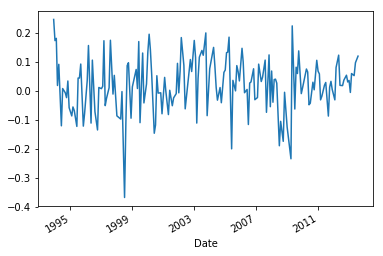

In [98]:
df_kse["kse_returns_monthly"].plot()

<h>Fig.1-monthly returns KSE100</h>

In [99]:
df_ex=pd.read_excel("exchange_rate_data.xlsx")
df_in=pd.read_excel("allindexes.xlsx")
df_ex.set_index("Year",inplace=True)
df_in.set_index("Date",inplace=True)
print(df_ex.head())

###Now in order to convert KSE100 data into dollar I will use the monthly averages from the df_ex dataframe
#### to convert KSE into common dollar and the compare the returns to all the other indexes


          JUL      AUG      SEP      OCT      NOV      DEC      JAN  \
Year                                                                  
1994  30.6665  30.6665  30.7267  30.7287  30.7768  30.8770  30.9372   
1995  31.2680  31.3983  31.6290  34.3357  34.3357  34.3357  34.3357   
1996  35.4083  35.7091  37.0625  40.2203  40.2203  40.2203  40.2203   
1997  40.6213  40.6213  40.6213  44.1602  44.1602  44.1602  44.1602   
1998  46.1150  46.1150  46.1150  46.1150  46.1150  46.1150  46.1150   

            FEB      MAR      APR        MAY        JUN  Average Yearly  
Year                                                                     
1994  30.957200  30.9572  30.9372  31.047500  31.087600       30.863842  
1995  34.435928  34.6063  34.8370  34.917100  35.187800       33.801852  
1996  40.220300  40.2203  40.3406  40.491000  40.561200       39.241208  
1997  44.160200  44.2636  44.1482  44.339700  46.237608       43.471167  
1998  46.115000  46.1150  46.1150  51.897712  51.560600   

Here I have the taken the monthly exchange rates,converted them to yearly averages through calculating mean of all months
and I will be using these averages to convert KSE100 into dollars for further comparsion

In [100]:
import numpy as np
df_kse['year'] = df_kse.index.to_period('Y')
df_kse["Index_months_USD"]=np.nan
# print(df_kse)
i=-1
for year in df_kse["year"]:
    i+=1
    for years in df_ex.index.tolist():
        if str(year)==str(years):
#             print(year,years,i)
            df_kse.iloc[i,3]=df_kse.iloc[i,0]/df_ex.loc[years,"Average Yearly"]


            
            
            
    

A piece of code which convert KSE values into dollar

In [101]:
df_kse.dropna(inplace=True)
df_kse["kse_returns_monthly_usd"]=df_kse["Index_months_resampled"].pct_change()
df_kse.dropna(inplace=True)
print(df_kse.head())#resampled the data to months

            Index_months_resampled  kse_returns_monthly year  \
Date                                                           
1994-02-28             2360.323500             0.018304 1994   
1994-03-31             2576.096957             0.091417 1994   
1994-05-31             2264.286364            -0.121040 1994   
1994-06-30             2282.014091             0.007829 1994   
1994-08-31             2266.300000            -0.006886 1994   

            Index_months_USD  kse_returns_monthly_usd  
Date                                                   
1994-02-28         76.475363                 0.018304  
1994-03-31         83.466504                 0.091417  
1994-05-31         73.363724                -0.121040  
1994-06-30         73.938109                 0.007829  
1994-08-31         73.428967                -0.006886  


Now I have calculated KSE_100 montly returns in dollars.

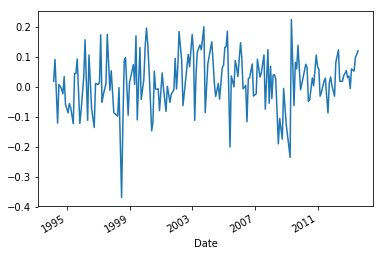

In [102]:
df_kse["kse_returns_monthly_usd"].plot()

<h> Fig.2 KSE100 monthly returns dollar</h>

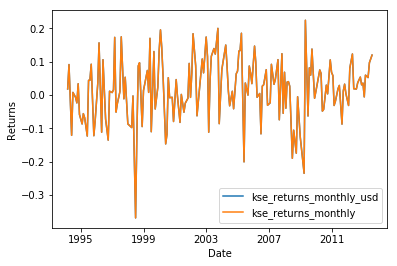

In [103]:
ax=plt.subplot(111)
ax.plot(df_kse["kse_returns_monthly_usd"])
ax.plot(df_kse["kse_returns_monthly"])
ax.set_xlabel("Date")
ax.set_ylabel("Returns")
plt.legend()
plt.show()

<h> Fig.3 KSE_100 Comparsion </h>

In [104]:
df_kse.to_excel("Table 1.xlsx")
df_kse.head()

,Index_months_resampled,kse_returns_monthly,year,Index_months_USD,kse_returns_monthly_usd
Date,,,,,
1994-02-28,2360.323500,0.018304,1994,76.475363,0.018304
1994-03-31,2576.096957,0.091417,1994,83.466504,0.091417
1994-05-31,2264.286364,-0.121040,1994,73.363724,-0.121040
1994-06-30,2282.014091,0.007829,1994,73.938109,0.007829
1994-08-31,2266.300000,-0.006886,1994,73.428967,-0.006886


<h>Table 1 My Final Calculations For KSE100(for full calculated table see table 1 excel file)</h>

In [105]:
df_ex.to_excel("Table 2.xlsx")
df_ex.head()

,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR,APR,MAY,JUN,Average Yearly
Year,,,,,,,,,,,,,
1994,30.6665,30.6665,30.7267,30.7287,30.7768,30.8770,30.9372,30.957200,30.9572,30.9372,31.047500,31.087600,30.863842
1995,31.2680,31.3983,31.6290,34.3357,34.3357,34.3357,34.3357,34.435928,34.6063,34.8370,34.917100,35.187800,33.801852
1996,35.4083,35.7091,37.0625,40.2203,40.2203,40.2203,40.2203,40.220300,40.2203,40.3406,40.491000,40.561200,39.241208
1997,40.6213,40.6213,40.6213,44.1602,44.1602,44.1602,44.1602,44.160200,44.2636,44.1482,44.339700,46.237608,43.471167
1998,46.1150,46.1150,46.1150,46.1150,46.1150,46.1150,46.1150,46.115000,46.1150,46.1150,51.897712,51.560600,47.050693


<h> Table 2 Exchange Rate Table With Calculated Yearly Averages(for full calculated table see table 2 excel file)</h>

In [106]:
df_in.rename(columns={"EAFE $":"EAFE_DOLLAR","EM $":"EM_DOLLAR"},inplace=True)
df_in["S&P 500 Composite_monthly_return"]=df_in["S&P 500 Composite"].pct_change()
df_in["EAFE_monthly_return"]=df_in["EAFE"].pct_change()
df_in["EAFE_DOLLAR_montly_return"]=df_in["EAFE_DOLLAR"].pct_change()
df_in["EM_monthly_return"]=df_in["EM"].pct_change()
df_in["EM_DOLLAR_monthly_return"]=df_in["EM_DOLLAR"].pct_change()
df_in.dropna(inplace=True)


In [107]:
df_in.to_excel("Table3.xlsx")
df_in

,S&P 500 Composite,EAFE,EAFE_DOLLAR,EM,EM_DOLLAR,S&P 500 Composite_monthly_return,EAFE_monthly_return,EAFE_DOLLAR_montly_return,EM_monthly_return,EM_DOLLAR_monthly_return
Date,,,,,,,,,,
1991-02-28,107.151459,112.259387,110.749287,116.651108,114.794094,0.071515,0.122594,0.107493,0.166511,0.147941
1991-03-29,109.746065,113.667539,104.127485,125.720235,119.511879,0.024214,0.012544,-0.059791,0.077746,0.041098
1991-04-30,110.005943,114.184608,105.180275,128.754601,120.770581,0.002368,0.004549,0.010111,0.024136,0.010532
1991-05-31,114.751513,116.039044,106.308803,140.860669,130.246338,0.043139,0.016241,0.010729,0.094024,0.078461
1991-06-28,109.494529,109.803067,98.524942,139.776096,125.593742,-0.045812,-0.053740,-0.073219,-0.007700,-0.035722
1991-07-31,114.597985,113.366437,103.392404,148.528344,132.105143,0.046609,0.032452,0.049403,0.062616,0.051845
1991-08-30,117.310409,110.756006,101.318001,155.514925,134.888664,0.023669,-0.023026,-0.020063,0.047039,0.021070
1991-09-30,115.349727,113.021759,107.058573,155.702880,129.718121,-0.016714,0.020457,0.056659,0.001209,-0.038332
1991-10-31,116.900652,114.485178,108.603049,167.344420,135.011453,0.013445,0.012948,0.014426,0.074768,0.040806


<h> Table3 Calculated Montly Returns for SandP500,EAFE(Local and Foriegn currency),
EM(Local and Foriegn currency)</h>


PLEASE NOTE THAT DUE TO LESS SPACE I HAVE ONLY SHOWN THE RETURNS BUT INDEX VALUES HAVE ALSO BEEN CALUCLATED WHICH IS
SELF EXPLANATIONARY(for full table see the excel file table 3).

In [108]:
df_in["KSE_returns_dollar"]=df_kse["kse_returns_monthly_usd"]
df_in["KSE_returns"]=df_kse["kse_returns_monthly"]
df_corr=df_in.corr()
df_corr.to_excel("Table 4.xlsx")
df_in.corr().head()

,S&P 500 Composite,EAFE,EAFE_DOLLAR,EM,EM_DOLLAR,S&P 500 Composite_monthly_return,EAFE_monthly_return,EAFE_DOLLAR_montly_return,EM_monthly_return,EM_DOLLAR_monthly_return,KSE_returns_dollar,KSE_returns
S&P 500 Composite,1.000000,0.941076,0.909663,0.834513,0.744408,-0.018874,0.027406,0.018493,-0.180560,-0.023560,0.136850,0.136850
EAFE,0.941076,1.000000,0.950812,0.813753,0.749239,-0.033942,0.034596,0.025318,-0.150993,-0.006292,0.081984,0.081984
EAFE_DOLLAR,0.909663,0.950812,1.000000,0.931988,0.902008,-0.003867,0.038219,0.046169,-0.135291,0.006681,0.071029,0.071029
EM,0.834513,0.813753,0.931988,1.000000,0.981455,-0.007480,0.011464,0.024939,-0.130053,0.003030,0.083178,0.083178
EM_DOLLAR,0.744408,0.749239,0.902008,0.981455,1.000000,0.017485,0.024954,0.038258,-0.089705,0.018903,0.057993,0.057993


<h> Table 4 Correlation table for all financial instruments in both local and foreign currency(for full table
see the excel file table 4)</h>

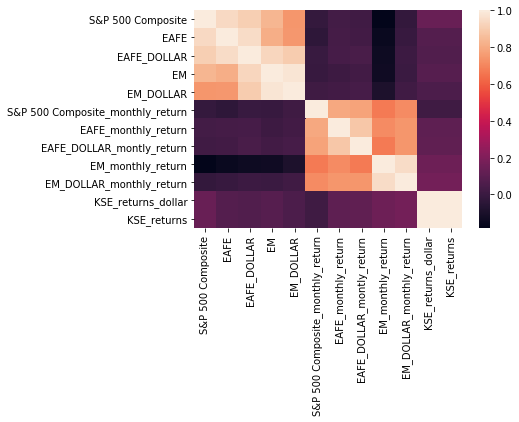

In [109]:
sns.heatmap(df_in.corr())

<h> Fig4 Heatmap for the associated corr table for better visualization</h>

In [2]:
df_factors=pd.read_excel("Factors_2.xlsx")
df_factors.set_index("Date",inplace=True)
df_factors["Mkt_Rf"]=df_factors["Mkt_Rf"].resample("M").mean()
df_factors["SMB"]=df_factors["SMB"].resample("M").mean()
df_factors["HML"]=df_factors["HML"].resample("M").mean()
df_factors["RF"]=df_factors["RF"].resample("M").mean()
df_factors.dropna(inplace=True)
# df_factors.to_excel("f.xlsx")
df_factors.head()

NameError: name 'pd' is not defined

Table 5 Factors

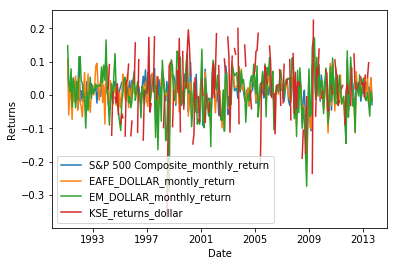

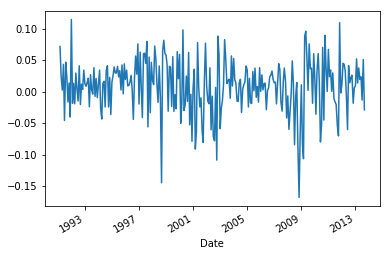

In [111]:
ax=plt.subplot(111)
ax.plot(df_in["S&P 500 Composite_monthly_return"])
ax.plot(df_in["EAFE_DOLLAR_montly_return"])
ax.plot(df_in["EM_DOLLAR_monthly_return"])
ax.plot(df_in["KSE_returns_dollar"])
ax.set_xlabel("Date")
ax.set_ylabel("Returns")
plt.legend()
plt.show()
df_in["S&P 500 Composite_monthly_return"].plot()

Fig 5(a)-Monthly returns for over the time horizion comparsion for all instruments

Fig5(b)(Below)-S and P 500 returns

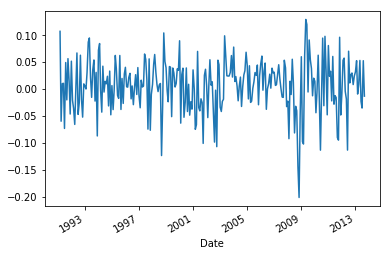

In [112]:
df_in["EAFE_DOLLAR_montly_return"].plot()

Fig6 EAFE DOLLAR Returns

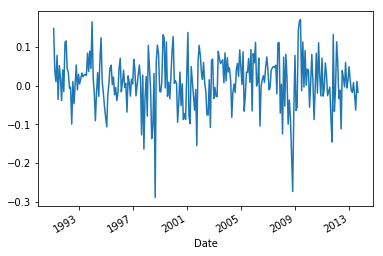

In [113]:
df_in["EM_DOLLAR_monthly_return"].plot()

Fig7 EM DOLLAR Returns

In [114]:
df_in["Mkt_Rf"]=df_factors["Mkt_Rf"]
df_in["RF"]=df_factors["RF"]
df_in_copy=df_in.copy()
df_in_copy.dropna(inplace=True)
###the data used for regression
df_in_copy.to_excel("Table 6.xlsx")
df_in_copy

,S&P 500 Composite,EAFE,EAFE_DOLLAR,EM,EM_DOLLAR,S&P 500 Composite_monthly_return,EAFE_monthly_return,EAFE_DOLLAR_montly_return,EM_monthly_return,EM_DOLLAR_monthly_return,KSE_returns_dollar,KSE_returns,Mkt_Rf,RF
Date,,,,,,,,,,,,,,
1994-02-28,148.986034,137.178319,138.138113,1019.645377,288.191248,-0.027141,-0.026017,-0.002564,0.032515,-0.017790,0.018304,0.018304,-0.132632,0.011
1994-03-31,142.490655,129.729646,132.217738,986.944618,262.113046,-0.043597,-0.054299,-0.042858,-0.032071,-0.090489,0.091417,0.091417,-0.210870,0.012
1994-05-31,146.686234,134.460754,137.094993,1080.959213,265.661432,0.016411,0.005819,-0.005528,0.069752,0.034225,-0.121040,-0.121040,0.032381,0.015
1994-06-30,143.090694,131.151296,139.063100,1101.589476,258.338729,-0.024512,-0.024613,0.014356,0.019085,-0.027564,0.007829,0.007829,-0.137727,0.014
1994-08-31,153.848640,136.250783,143.786770,1294.623083,308.458616,0.041000,0.021404,0.023895,0.113016,0.124113,-0.006886,-0.006886,0.170870,0.016
1994-09-30,150.086539,129.946040,139.289637,1300.663900,311.964137,-0.024453,-0.046273,-0.031276,0.004666,0.011365,-0.023631,-0.023631,-0.109048,0.017
1994-10-31,153.458433,131.326345,143.960499,1274.695216,306.336818,0.022466,0.010622,0.033533,-0.019966,-0.018038,0.033878,0.033878,0.065238,0.018
1994-11-30,147.868586,128.538420,137.073362,1210.856374,290.409044,-0.036426,-0.021229,-0.047840,-0.050082,-0.051994,-0.058381,-0.058381,-0.192857,0.018
1995-01-31,153.954729,123.175244,132.696594,1058.710793,238.668786,0.025933,-0.048226,-0.038178,-0.093266,-0.106392,-0.086864,-0.086864,0.085238,0.020


Table 6 Combined all of the returns with Factor table for CAPM model-adjusted for missing values(for complete calculated 
table see table 6 excel file)

In [115]:
##The regressions result are not accurate as of right now need some changes as the date time lag is very large
##for predicting accurate beta,need to reduce the lag
import numpy as np
X=np.array(df_in_copy["Mkt_Rf"]).reshape(-1,1)
y=np.array(df_in_copy["S&P 500 Composite_monthly_return"]-df_in_copy["RF"])
clf=LinearRegression()
clf.fit(X,y)
beta_sp500=clf.coef_
print("The estimate beta for sandp 500 under CAPM MODEL with given data is:",beta_sp500)

The estimate beta for sandp 500 under CAPM MODEL with given data is: [0.20512881]


In [116]:
import numpy as np
X=np.array(df_in_copy["Mkt_Rf"]).reshape(-1,1)
y=np.array(df_in_copy["EAFE_DOLLAR_montly_return"]-df_in_copy["RF"])
clf=LinearRegression()
clf.fit(X,y)
beta_eafe=clf.coef_
print("The estimate beta for eafe under CAPM MODEL with given data is:",beta_eafe)

The estimate beta for eafe under CAPM MODEL with given data is: [0.18522279]


In [117]:
import numpy as np
X=np.array(df_in_copy["Mkt_Rf"]).reshape(-1,1)
y=np.array(df_in_copy["EM_DOLLAR_monthly_return"]-df_in_copy["RF"])
clf=LinearRegression()
clf.fit(X,y)
beta_em=clf.coef_
print("The estimate beta for em under CAPM MODEL with given data is:",beta_em)

The estimate beta for em under CAPM MODEL with given data is: [0.25544116]


In [118]:
import numpy as np
X=np.array(df_in_copy["Mkt_Rf"]).reshape(-1,1)
y=np.array(df_in_copy["KSE_returns_dollar"]-df_in_copy["RF"])
clf=LinearRegression()
clf.fit(X,y)
beta_kse=clf.coef_
print("The estimate beta for kse under CAPM MODEL with given data is:",beta_kse)

The estimate beta for kse under CAPM MODEL with given data is: [0.01692614]


Please note that for both CAPM model and Fama-French Factor Regression I have used  dollar adjusted returns as it accounts for a more a sound comparsion
with S and P 500.

In [119]:
df_in["Mkt_Rf"]=df_factors["Mkt_Rf"]
df_in["RF"]=df_factors["RF"]
df_in["SMB"]=df_factors["SMB"]
df_in["HML"]=df_factors["HML"]
df_in_copy1=df_in.copy()
df_in_copy1.dropna(inplace=True)
df_in_copy1.to_excel("Table7.xlsx")
df_in_copy1###the data used for multiple regression to calculate all the betas

,S&P 500 Composite,EAFE,EAFE_DOLLAR,EM,EM_DOLLAR,S&P 500 Composite_monthly_return,EAFE_monthly_return,EAFE_DOLLAR_montly_return,EM_monthly_return,EM_DOLLAR_monthly_return,KSE_returns_dollar,KSE_returns,Mkt_Rf,RF,SMB,HML
Date,,,,,,,,,,,,,,,,
1994-02-28,148.986034,137.178319,138.138113,1019.645377,288.191248,-0.027141,-0.026017,-0.002564,0.032515,-0.017790,0.018304,0.018304,-0.132632,0.011,0.143684,-0.074737
1994-03-31,142.490655,129.729646,132.217738,986.944618,262.113046,-0.043597,-0.054299,-0.042858,-0.032071,-0.090489,0.091417,0.091417,-0.210870,0.012,-0.038261,0.062174
1994-05-31,146.686234,134.460754,137.094993,1080.959213,265.661432,0.016411,0.005819,-0.005528,0.069752,0.034225,-0.121040,-0.121040,0.032381,0.015,-0.091429,0.003810
1994-06-30,143.090694,131.151296,139.063100,1101.589476,258.338729,-0.024512,-0.024613,0.014356,0.019085,-0.027564,0.007829,0.007829,-0.137727,0.014,-0.018182,0.078636
1994-08-31,153.848640,136.250783,143.786770,1294.623083,308.458616,0.041000,0.021404,0.023895,0.113016,0.124113,-0.006886,-0.006886,0.170870,0.016,0.059565,-0.143478
1994-09-30,150.086539,129.946040,139.289637,1300.663900,311.964137,-0.024453,-0.046273,-0.031276,0.004666,0.011365,-0.023631,-0.023631,-0.109048,0.017,0.128095,-0.090000
1994-10-31,153.458433,131.326345,143.960499,1274.695216,306.336818,0.022466,0.010622,0.033533,-0.019966,-0.018038,0.033878,0.033878,0.065238,0.018,-0.101905,-0.111429
1994-11-30,147.868586,128.538420,137.073362,1210.856374,290.409044,-0.036426,-0.021229,-0.047840,-0.050082,-0.051994,-0.058381,-0.058381,-0.192857,0.018,-0.006190,-0.002857
1995-01-31,153.954729,123.175244,132.696594,1058.710793,238.668786,0.025933,-0.048226,-0.038178,-0.093266,-0.106392,-0.086864,-0.086864,0.085238,0.020,-0.138571,0.079524


Table 7 Combined all of the returns with Factor table for Fama-French Factor Regression
-adjusted for missing values
(for complete calculated  table see table 7 excel file)

In [120]:
import numpy as np
X=np.array(df_in_copy1[["Mkt_Rf","SMB","HML"]])
y=np.array(df_in_copy1["S&P 500 Composite_monthly_return"]-df_in_copy1["RF"])
clf=LinearRegression()
clf.fit(X,y)
beta_sandp500=clf.coef_
print("The estimate betas for sandp 500 under Fama-French Factor Regression with given data is:",beta_sandp500)

The estimate betas for sandp 500 under Fama-French Factor Regression with given data is: [ 0.21696953 -0.03494916  0.0222487 ]


In [121]:
import numpy as np
X=np.array(df_in_copy1[["Mkt_Rf","SMB","HML"]])
y=np.array(df_in_copy1["EAFE_DOLLAR_montly_return"]-df_in_copy1["RF"])
clf=LinearRegression()
clf.fit(X,y)
beta_eafe=clf.coef_
print("The estimate betas for eafe with under Fama-French Factor Regression given data is:",beta_eafe)

The estimate betas for eafe with under Fama-French Factor Regression given data is: [0.19146941 0.03330851 0.05306955]


In [122]:
import numpy as np
X=np.array(df_in_copy1[["Mkt_Rf","SMB","HML"]])
y=np.array(df_in_copy1["EM_DOLLAR_monthly_return"]-df_in_copy1["RF"])
clf=LinearRegression()
clf.fit(X,y)
beta_em=clf.coef_
print("The estimate betas for em under Fama-French Factor Regression with given data is:",beta_em)

The estimate betas for em under Fama-French Factor Regression with given data is: [0.24779432 0.0940093  0.04269328]


In [123]:
import numpy as np
X=np.array(df_in_copy1[["Mkt_Rf","SMB","HML"]])
y=np.array(df_in_copy1["KSE_returns_dollar"]-df_in_copy1["RF"])
clf=LinearRegression()
clf.fit(X,y)
beta_kse=clf.coef_
print("The estimate betas for kse under Fama-French Factor Regression with given data is:",beta_kse)

The estimate betas for kse under Fama-French Factor Regression with given data is: [0.01720959 0.10544822 0.08542755]


The mean of SANDP500 returns is about: 0.008605939185586789 and the standard dev is: 0.04522865752412346


C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


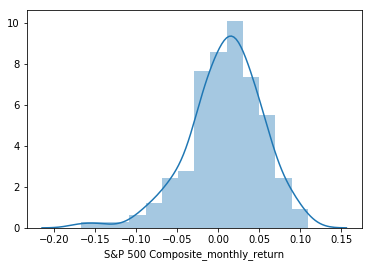

In [124]:
#Now caculating the expected return on each of the individual expected returns:
from statistics import mean,stdev
SandP500return=mean(df_in_copy1["S&P 500 Composite_monthly_return"])
SandPstandarddev=stdev(df_in_copy1["S&P 500 Composite_monthly_return"]) 
print("The mean of SANDP500 returns is about:",SandP500return,"and the standard dev is:",SandPstandarddev)
sns.distplot(df_in_copy1["S&P 500 Composite_monthly_return"])

Fig.8 SandP500 returns distribution

The mean of EAFE returns is about: 0.0048759306389617495 and the standard dev is: 0.048495643914728624


C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


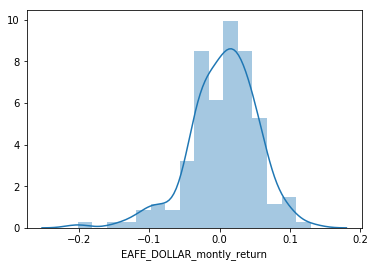

In [125]:
from statistics import mean,stdev
SandP500return=mean(df_in_copy1["EAFE_DOLLAR_montly_return"])
SandPstandarddev=stdev(df_in_copy1["EAFE_DOLLAR_montly_return"]) 
print("The mean of EAFE returns is about:",SandP500return,"and the standard dev is:",SandPstandarddev)
sns.distplot(df_in_copy1["EAFE_DOLLAR_montly_return"])

Fig.9 EAFE Dollar Adjusted returns distribution

The mean of EM returns is about: 0.009036531076885757 and the standard dev is: 0.07180198162901183


C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


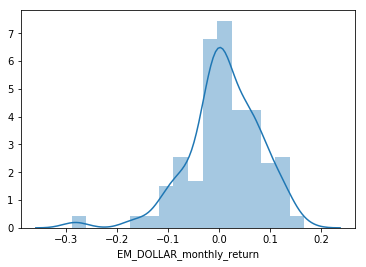

In [126]:
from statistics import mean,stdev
SandP500return=mean(df_in_copy1["EM_DOLLAR_monthly_return"])
SandPstandarddev=stdev(df_in_copy1["EM_DOLLAR_monthly_return"]) 
print("The mean of EM returns is about:",SandP500return,"and the standard dev is:",SandPstandarddev)
sns.distplot(df_in_copy1["EM_DOLLAR_monthly_return"])

Fig.10 EM Dollar djusted returns distribution

The mean of KSE returns is about: 0.01762482422919961 and the standard dev is: 0.09221655449181404


C:\Users\MMOHTASHIM\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


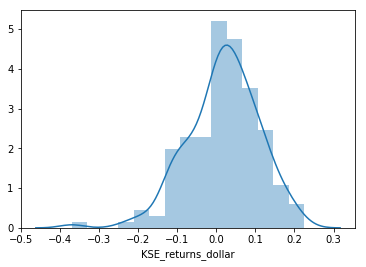

In [127]:
from statistics import mean,stdev
SandP500return=mean(df_in_copy1["KSE_returns_dollar"])
SandPstandarddev=stdev(df_in_copy1["KSE_returns_dollar"]) 
print("The mean of KSE returns is about:",SandP500return,"and the standard dev is:",SandPstandarddev)
sns.distplot(df_in_copy1["KSE_returns_dollar"])

Fig.11 KSE 100 Dolaar Adjusted Returns distribution